### Базовый анализ признаков

In [8]:
import notebook_setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.config import INTERIM_DATA_DIR, REPORTS_DIR
from src.features.extractor import FeatureIO
from src.analysis.metrics import FeatureAnalysisMetrics
from src.analysis.visualization import FeatureVisualizer

clip_features = FeatureIO.load_features(INTERIM_DATA_DIR / "clip_features.pkl")

print(f"Loaded CLIP features: {len(clip_features)} samples")
print(f"Feature dimension: {clip_features.feature_dimension}")
print(f"Extractor type: {clip_features.extractor_type}")


2025-08-05 16:38:40.164 | INFO     | src.features.extractor:load_features:109 - Загрузка признаков из D:\workspace\projects\freelance\3d_recognition_analisis\data\interim\clip_features.pkl
2025-08-05 16:38:40.165 | SUCCESS  | src.features.extractor:load_features:114 - Признаки загружены из D:\workspace\projects\freelance\3d_recognition_analisis\data\interim\clip_features.pkl
Loaded CLIP features: 129 samples
Feature dimension: 512
Extractor type: CLIP


In [9]:
metrics = FeatureAnalysisMetrics()
analysis = metrics.analyze_feature_dataset(clip_features)

print("\nAnalysis results:")
for key, value in analysis.items():
    if isinstance(value, (int, float)):
        print(f"{key}: {value:.4f}")
    elif isinstance(value, dict) and len(value) < 10:
        print(f"{key}: {value}")

2025-08-05 16:39:19.036 | INFO     | src.analysis.metrics:analyze_feature_dataset:119 - Анализ признаков для экстрактора: CLIP

Analysis results:
feature_dimension: 512.0000
n_samples: 129.0000
n_classes: 12.0000
silhouette_score: 0.4241
calinski_harabasz_score: 44.3484
inertia: 1.1957
n_clusters: 12.0000
avg_intra_class_similarity: 0.9884
avg_inter_class_distance: 0.0451
separability_index: 3.8944


c:\Users\dev\miniconda3\envs\cv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Инициализируем визуализатор
visualizer = FeatureVisualizer(REPORTS_DIR / "figures")

print(f"Visualizer initialized. Plots will be saved to: {REPORTS_DIR / 'figures'}")

2025-08-05 16:50:50.261 | INFO     | src.analysis.visualization:__init__:24 - Визуализации будут сохранены в: D:\workspace\projects\freelance\3d_recognition_analisis\reports\figures
Visualizer initialized. Plots will be saved to: D:\workspace\projects\freelance\3d_recognition_analisis\reports\figures


##### Распределение признаков

2025-08-05 16:51:21.414 | INFO     | src.analysis.visualization:plot_feature_distribution:82 - График сохранен: D:\workspace\projects\freelance\3d_recognition_analisis\reports\figures\CLIP_feature_distribution.png


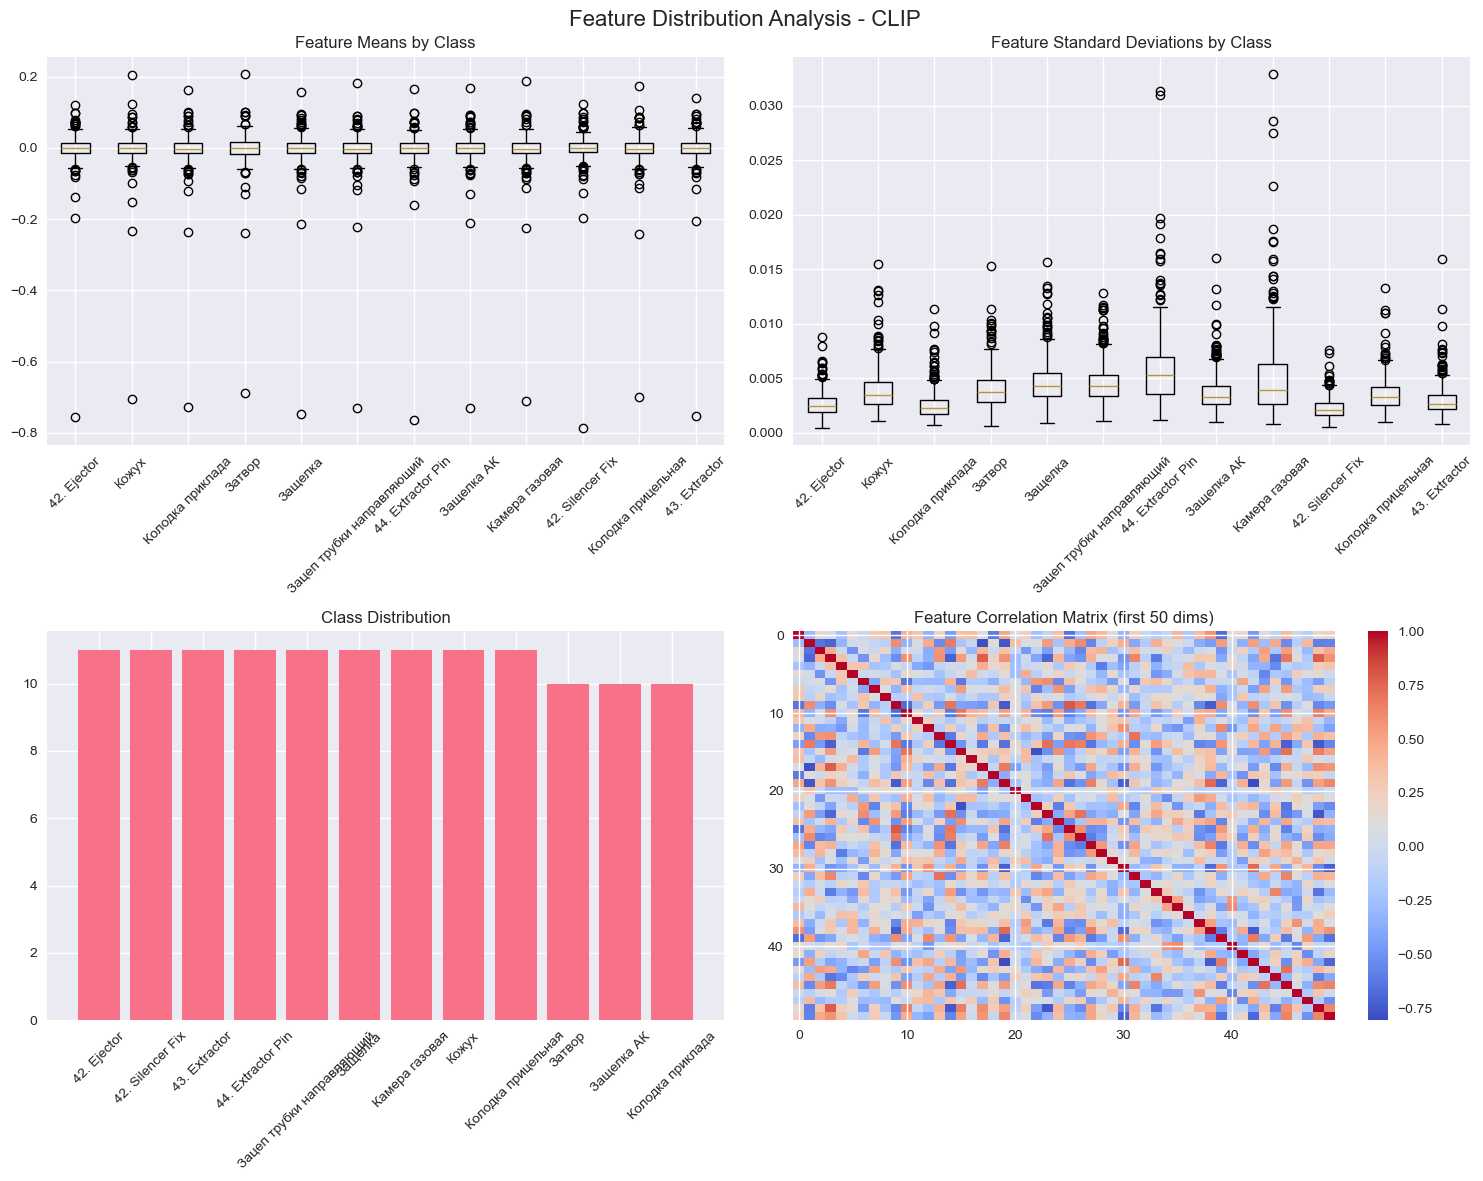

In [11]:
visualizer.plot_feature_distribution(clip_features, save=True)

##### Понижение размерности

2025-08-05 16:52:11.884 | INFO     | src.analysis.visualization:plot_dimensionality_reduction:128 - График сохранен: D:\workspace\projects\freelance\3d_recognition_analisis\reports\figures\CLIP_dimensionality_reduction.png


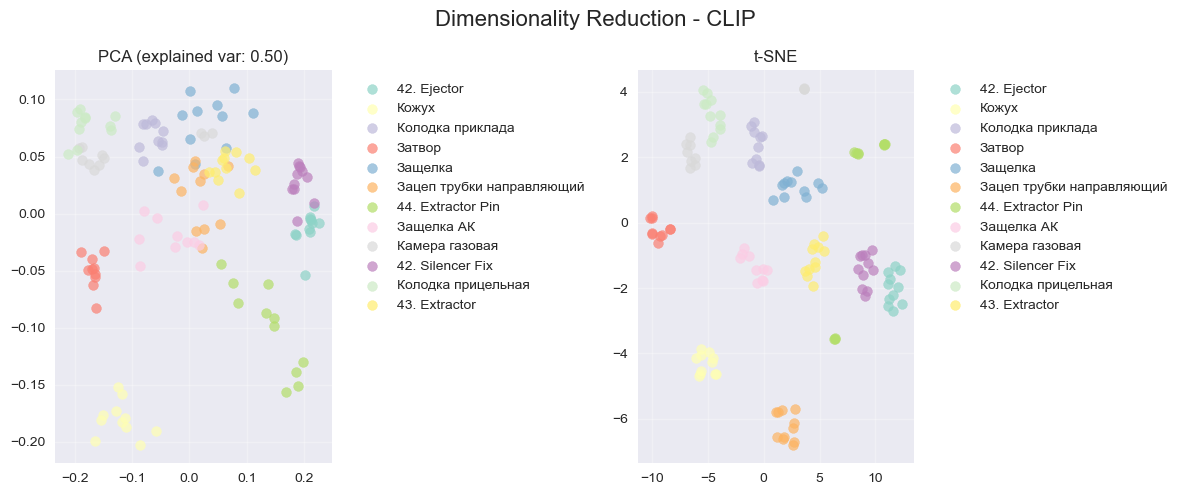

In [12]:
visualizer.plot_dimensionality_reduction(clip_features, methods=['pca', 'tsne'], save=True)

##### Тепловая карта схожести

2025-08-05 16:52:34.064 | INFO     | src.analysis.visualization:plot_similarity_heatmap:178 - График сохранен: D:\workspace\projects\freelance\3d_recognition_analisis\reports\figures\CLIP_similarity_heatmap.png


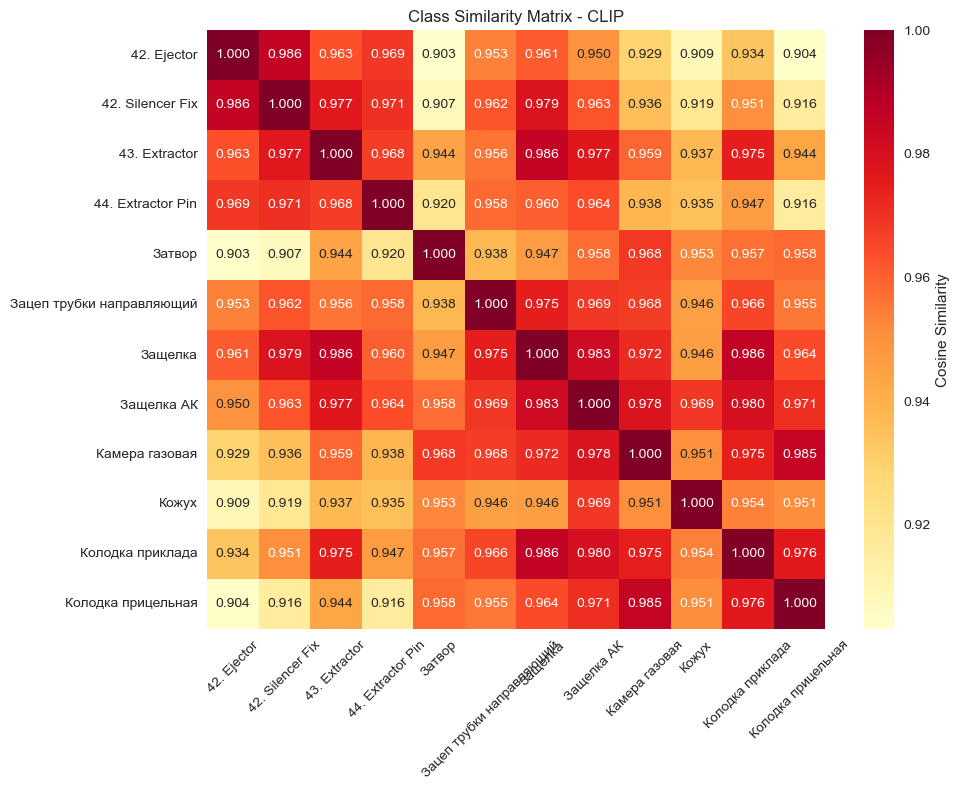

In [13]:
visualizer.plot_similarity_heatmap(clip_features, save=True)